In [1]:
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# create a synthetic datset
X, y = make_blobs(random_state=0)

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)

# evaluate the model on the test set
print('Test set score: {:.2f}'.format(logreg.score(X_test, y_test)))

Test set score: 0.88


# Cross Validation

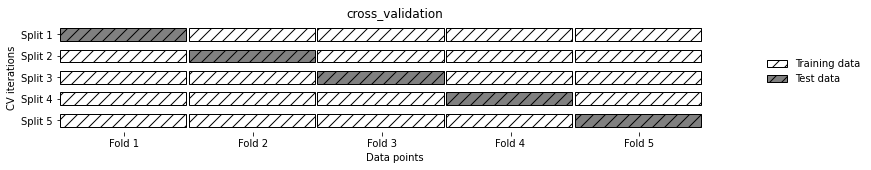

In [3]:
import mglearn
mglearn.plots.plot_cross_validation()

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [5]:
iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, iris.data, iris.target)
print('Cross-Validation Scores: {}'.format(scores))

Cross-Validation Scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [6]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print('Cross-Validation Scores: {}'.format(scores))

Cross-Validation Scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [7]:
print('Average Cross-validation Score: {:.2f}'.format(scores.mean()))

Average Cross-validation Score: 0.97


### Stratified K-Fold cross-validation

In [8]:
from sklearn.datasets import load_iris

In [9]:
iris = load_iris()
print('Iris labels:\n {}'.format(iris.target))

Iris labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


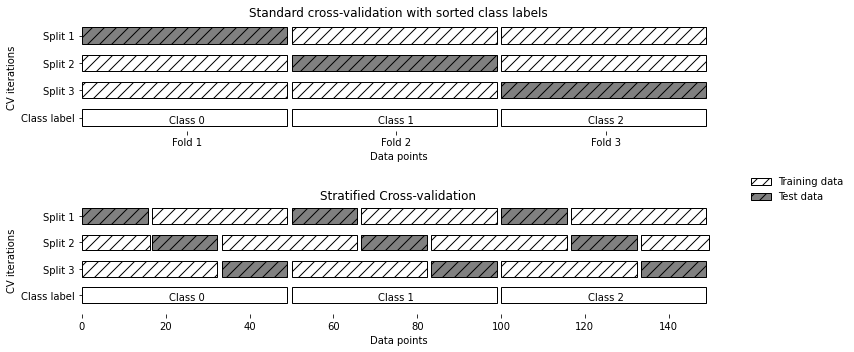

In [10]:
mglearn.plots.plot_stratified_cross_validation()

In [11]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

print('Cross-validation scores:\n{}'.format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


In [12]:
kfold = KFold(n_splits=3)
print('Cross-validation scores:\n{}'.format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


In [13]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0) # the problem can be solved by shuffling the data 

print('Cross-validation scores:\n{}'.format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.98 0.96 0.96]


### Leave-One-Out Cross-Validation

In [14]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)

print('Number of cv iterations:', len(scores))
print('Mean accuracy: {:.2f}'.format(scores.mean()))

Number of cv iterations: 150
Mean accuracy: 0.97


### Shuffle-Split Cross-Validation

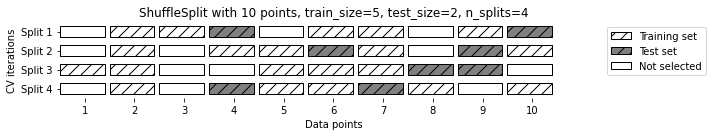

In [15]:
mglearn.plots.plot_shuffle_split()

In [16]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=0.5, train_size=0.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print('Cross-validation scores:\n{}'.format(scores))

Cross-validation scores:
[0.93333333 0.96       0.96       0.97333333 0.97333333 0.92
 0.92       0.97333333 0.97333333 0.96      ]


### Cross-validation with groups

In [17]:
from sklearn.model_selection import GroupKFold

# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)

# assume the first three samples belong to the same group, then the next four, etc.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = [cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))]
print('Cross-Validation Scores: \n{}'.format(scores))

Cross-Validation Scores: 
[array([0.75      , 0.6       , 0.66666667])]


C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass groups=[0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


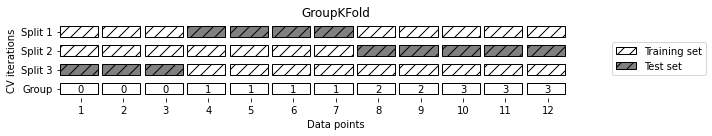

In [18]:
mglearn.plots.plot_group_kfold()

# Grid Search
### Simple Grid Search

In [19]:
# naive grid search implementation

from sklearn.svm import SVC

X_train, X_test, y_train, y_test =  train_test_split(iris.data, iris.target, random_state=0)
print('Size of training set: {}\nSize of test set: {}'.format(X_train.shape[0], X_test.shape[0]))


Size of training set: 112
Size of test set: 38


In [20]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        # evaluate SVC on test set
        score = svm.score(X_test, y_test)
        
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print('Best score: {:.2f}'.format(best_score))
print('Best person: {}'.format(best_parameters))

Best score: 0.97
Best person: {'C': 100, 'gamma': 0.001}


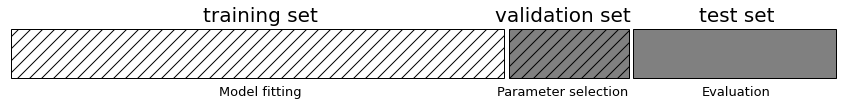

In [21]:
# The danger of overfitting the parameters and the validation set
mglearn.plots.plot_threefold_split()

In [22]:
from sklearn.svm import SVC

# splitting of data
# all_data to trainval and test > trainval to train and validation

# split data into train + validation set and test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)

# split data into train + validation set and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print('Size of training set: {}\n Size of validation set: {}\n Size of test set: {}'.format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Size of training set: 84
 Size of validation set: 28
 Size of test set: 38


In [23]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        # evaluate SVC on test set
        score = svm.score(X_valid, y_valid)
        
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model on the combined trianing set and validation set
# and evaluate it on test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print('Best score on validation set: {:.2f}'.format(best_score))
print('Best person: {}'.format(best_parameters))
print('Test score with best performance: {:.2f}'.format(test_score))

Best score on validation set: 0.96
Best person: {'C': 10, 'gamma': 0.001}
Test score with best performance: 0.92


### Grid Search with Cross-Validation

In [24]:
import numpy as np

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
# rebuild a model on the combined trianing set and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

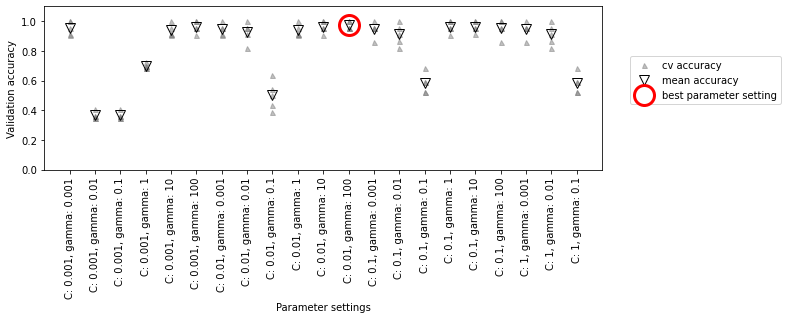

In [25]:
mglearn.plots.plot_cross_val_selection()

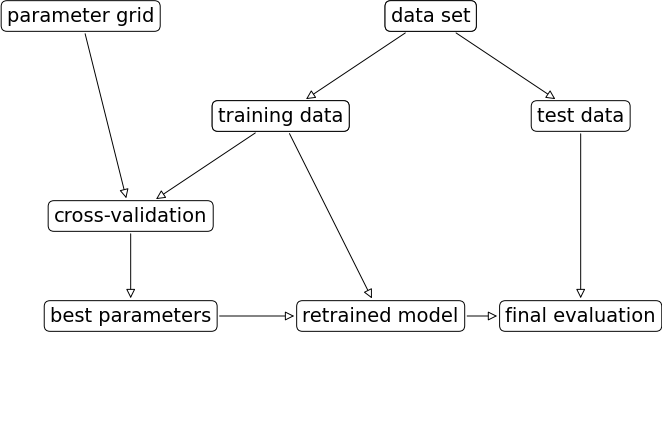

In [26]:
mglearn.plots.plot_grid_search_overview()

In [27]:
# applying GridSearchGV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

grid_search.fit(X_train, y_train)

print('Test set score: {:.2f}'.format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [28]:
print('Best Parameters: {}'.format(grid_search.best_params_))
print('Best Cross-Validation Score: {:.2f}'.format(grid_search.best_score_))

print('Best Estimator: {}'.format(grid_search.best_estimator_))

Best Parameters: {'C': 10, 'gamma': 0.1}
Best Cross-Validation Score: 0.97
Best Estimator: SVC(C=10, gamma=0.1)


In [29]:
import pandas as pd

results = pd.DataFrame(grid_search.cv_results_)

results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000612,0.000500,0.000200,0.000399,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.000704,0.000397,0.000749,0.001289,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.000296,0.000398,0.000206,0.000412,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.001550,0.002837,0.000203,0.000406,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.000459,0.000566,0.000000,0.000000,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


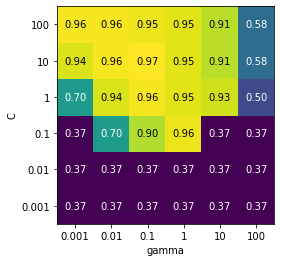

In [30]:
scores = np.array(results.mean_test_score).reshape(6,6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                     ylabel='C', yticklabels=param_grid['C'], cmap='viridis')

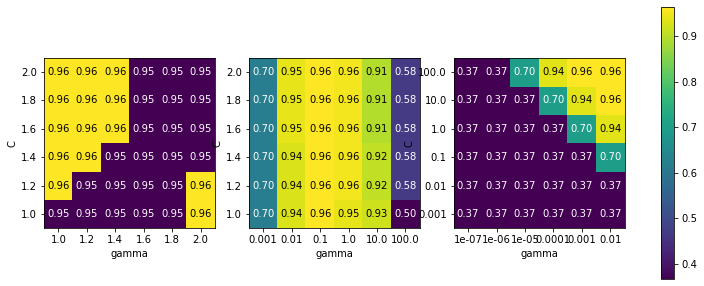

In [31]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1,2,6),
                    'gamma': np.linspace(1,2,6)}
param_grid_one_log = {'C': np.linspace(1,2,6),
                     'gamma': np.logspace(-3,2,6)}
param_grid_range = {'C': np.logspace(-3,2,6),
                   'gamma': np.logspace(-7,-2,6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
    
    # plot the mean cross-validation scores
    scores_image = mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
                                        yticklabels=param_grid['C'], cmap='viridis', ax=ax)
plt.colorbar(scores_image, ax=axes.tolist())

### Search Over spaces that are not grids

In [32]:
param_grid = [{'kernel':['rbf'], 'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10]},
              {'kernel':['rbf'], 'C':[0.001, 0.01, 0.1, 1, 10, 100]}]

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

grid_search.fit(X_train, y_train)

print('Best parameters: {}'.format(grid_search.best_params_))
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [33]:
results = pd.DataFrame(grid_search.cv_results_)
results = results.T

results.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
mean_fit_time,0.00169449,0.000604916,0.00162253,0.000205803,0.00159974,0.000206518,0,0.00200911,0,0.00162377,...,0.000203514,0,0,0.000199842,0.000409937,0.00160494,0.00160294,0.000199556,0,0.00041008
std_fit_time,0.000789636,0.000494071,0.00324507,0.000411606,0.00319948,0.000413036,0,0.00352576,0,0.00324755,...,0.000407028,0,0,0.000399685,0.000819874,0.00320988,0.00320587,0.000399113,0,0.00082016
mean_score_time,0.000862217,0,0,0,3.85284e-05,0,0.000487328,0,0.000205946,0,...,0,0,0.000206137,0,0,0,0,0.00019989,0,0
std_score_time,0.000373076,0,0,0,7.70569e-05,0,0.000974655,0,0.000411892,0,...,0,0,0.000412273,0,0,0,0,0.00039978,0,0
param_C,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100


# Using different cross-validation strategies with grid search
### Nested Cross-Validation

In [34]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    
    # for each split of data in the outer cross-validation
    for training_samples, test_samples in outer_cv.split(X, y): # split method returns indices of training and test parts
        best_parms = {} # find best parameter using cross-validation
        best_score = -np.inf
        
        #iterate over parameters
        for parameters in parameter_grid:
            cv_scores = [] # accumulate scores over inner splits
            
            # iterate over inner cross-validation
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                clf = Classifier(**parameters) # build classifier given parameters and training data
                clf.fit(X[inner_train], y[inner_train])
                
                score = clf.score(X[inner_train], y[inner_train])
                cv_scores.append(score)
                
            # compute mean score over inner folds
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
    
        # build classifier on best parameters using outer training set
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
    
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    
    return np.array(outer_scores)          

In [35]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold

scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), 
                  StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print('Cross-validation scores: {}'.format(scores))

Cross-validation scores: [1.         0.9        0.86666667 0.96666667 0.96666667]


# Evaluation Metrics and Scoring
### Imbalanced Datasets

In [36]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [37]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

pred_most_frequent = dummy_majority.predict(X_test)

print('Unique predicted labels: {}'.format(np.unique(pred_most_frequent)))
print('Test score: {:.2f}'.format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


In [38]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print('Test score: {:.2f}'.format(tree.score(X_test, y_test)))

Test score: 0.92


In [39]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print('dummy score: {:.2f}'.format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print('logreg score: {:.2f}'.format(logreg.score(X_test, y_test)))

dummy score: 0.84
logreg score: 0.98


C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "
C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print('Confusion matrix:\n{}'.format(confusion))

Confusion matrix:
[[402   1]
 [  6  41]]


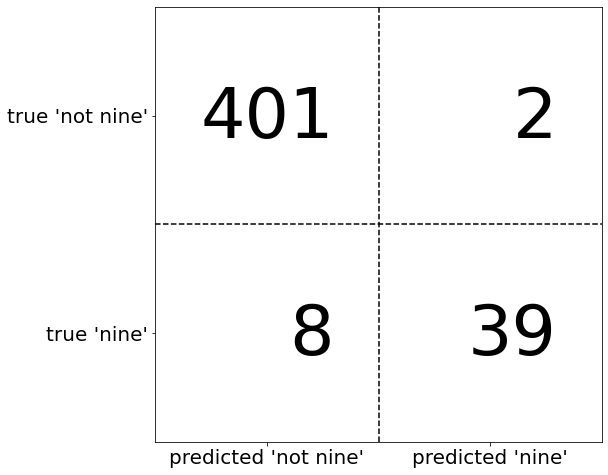

In [41]:
mglearn.plots.plot_confusion_matrix_illustration()

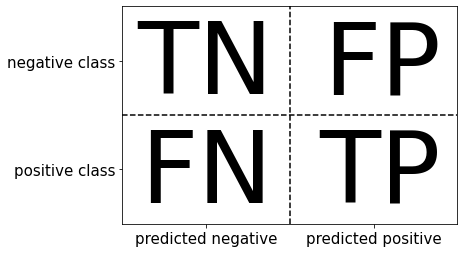

In [42]:
mglearn.plots.plot_binary_confusion_matrix()

In [43]:
print('Most frequent class:')
print(confusion_matrix(y_test, pred_most_frequent))

print('\nDummy Model:')
print(confusion_matrix(y_test, pred_dummy))

print('\nDecisionTree')
print(confusion_matrix(y_test, pred_tree))

print('\nLogisticRegression')
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy Model:
[[356  47]
 [ 43   4]]

DecisionTree
[[390  13]
 [ 24  23]]

LogisticRegression
[[402   1]
 [  6  41]]


In [44]:
from sklearn.metrics import f1_score

print('f1 score Most frequent class:')
print(f1_score(y_test, pred_most_frequent))

print('f1 score Dummy Model:')
print(f1_score(y_test, pred_dummy))

print('f1 score DecisionTree')
print(f1_score(y_test, pred_tree))

print('f1 score LogisticRegression')
print(f1_score(y_test, pred_logreg))

f1 score Most frequent class:
0.0
f1 score Dummy Model:
0.08163265306122448
f1 score DecisionTree
0.5542168674698795
f1 score LogisticRegression
0.9213483146067415


In [45]:
from sklearn.metrics import classification_report

print('Classification Report:')
print(classification_report(y_test, pred_most_frequent, target_names=['not nine', 'nine']))

Classification Report:
              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
print(classification_report(y_test, pred_dummy, target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.89      0.88      0.89       403
        nine       0.08      0.09      0.08        47

    accuracy                           0.80       450
   macro avg       0.49      0.48      0.48       450
weighted avg       0.81      0.80      0.80       450



In [47]:
print(classification_report(y_test, pred_logreg, target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



### Taking uncertainty into account

In [48]:
from mglearn.datasets import make_blobs
X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0,2], random_state=22)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.5).fit(X_train, y_train)

C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


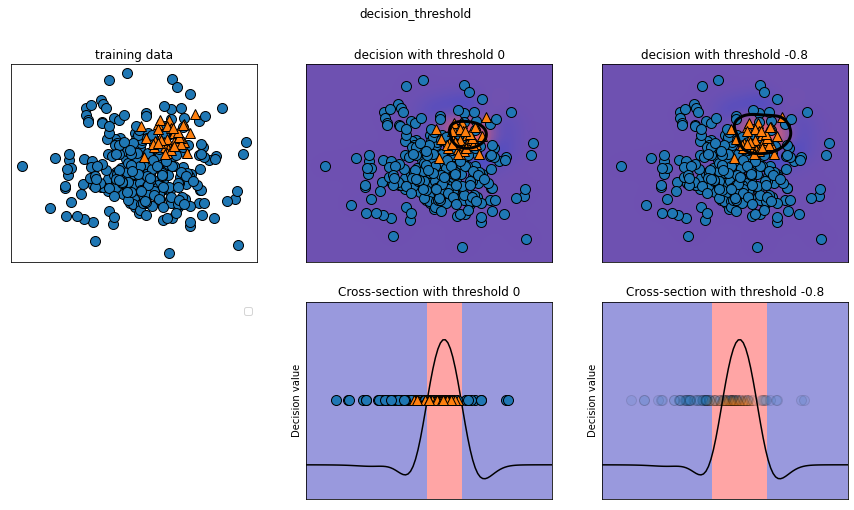

In [49]:
mglearn.plots.plot_decision_threshold()

In [50]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       104
           1       0.20      0.33      0.25         9

    accuracy                           0.84       113
   macro avg       0.57      0.61      0.58       113
weighted avg       0.88      0.84      0.86       113



In [51]:
y_pred_lower_threshold =  svc.decision_function(X_test) > -.8

In [52]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89       104
           1       0.31      1.00      0.47         9

    accuracy                           0.82       113
   macro avg       0.66      0.90      0.68       113
weighted avg       0.95      0.82      0.86       113



  ### Precision-recall curves and ROC curves

In [53]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


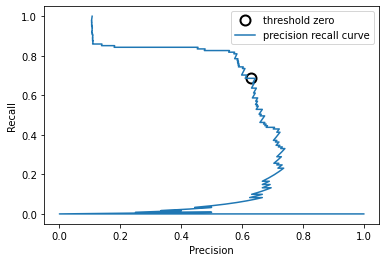

In [54]:
# use more data points for a smoother curve
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.5).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, 
          label='threshold zero', fillstyle='none', c='k', mew=2)

plt.plot(precision, recall, label='precision recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend(loc='best')

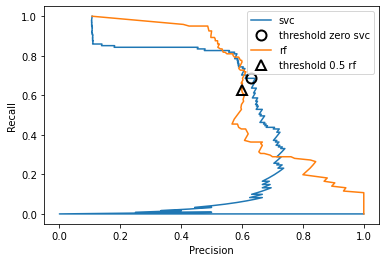

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label='svc')
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, 
         label='threshold zero svc', fillstyle='none', c='k', mew=2)
plt.plot(precision_rf, recall_rf, label='rf')
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k', 
         markersize=10, label='threshold 0.5 rf', fillstyle='none', mew=2)

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend(loc='best')

In [56]:
print('f1_score of randomforest: {:.3f}'.format(f1_score(y_test, rf.predict(X_test))))
print('f1_score of svc: {:.3f}'.format(f1_score(y_test, svc.predict(X_test))))

f1_score of randomforest: 0.610
f1_score of svc: 0.656


In [57]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))

print('Average precision of random forest: {:.3f}'.format(ap_rf))
print('Average precision of svc: {:.3f}'. format(ap_svc))

Average precision of random forest: 0.660
Average precision of svc: 0.567


### Receiver Operating Characteristics (ROC) and AUC

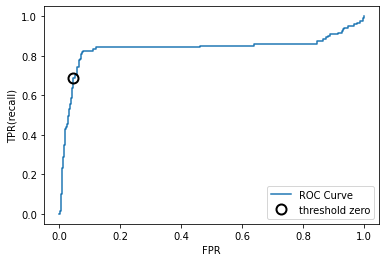

In [58]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR(recall)')

# find threshold closest to zero

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, 
             label='threshold zero', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

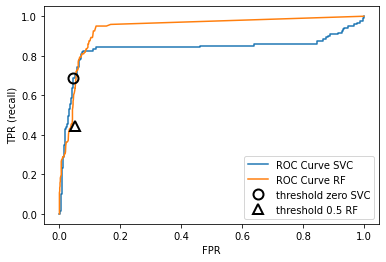

In [59]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

In [60]:
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))

print('AUC for Random Forest: {:.3f}'.format(rf_auc))
print('AUC for SVC: {:.3f}'.format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.836


gamma = 1.00 accuracy = 0.90 AUC = 0.50
gamma = 0.05 accuracy = 0.90 AUC = 1.00
gamma = 0.01 accuracy = 0.90 AUC = 1.00


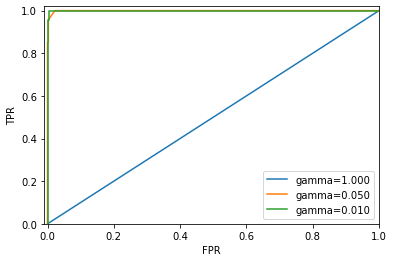

In [61]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print('gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}'.format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label='gamma={:.3f}'.format(gamma))
    
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc='best')

# Metrics for Multiclass Classification

In [62]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)

print('Accuracy: {:.3f}'.format(accuracy_score(y_test, pred)))
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test, pred)))

Accuracy: 0.951
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


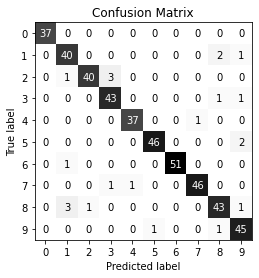

In [63]:
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), 
                                     xlabel='Predicted label', 
                                     ylabel='True label', 
                                     xticklabels=digits.target_names, 
                                     yticklabels=digits.target_names, 
                                     cmap=plt.cm.gray_r, 
                                     fmt='%d')
plt.title('Confusion Matrix')
plt.gca().invert_yaxis()

In [64]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [65]:
# for each sample
print("Micro average f1 score: {:.3f}".format(
    f1_score(y_test, pred, average="micro")))

# for each class
print("Macro average f1 score: {:.3f}".format(
    f1_score(y_test, pred, average="macro")))

Micro average f1 score: 0.951
Macro average f1 score: 0.952


# Regression Metrics
### Using Evaluation Metrics in model selection

In [66]:
# default scoring for classification is accuracy
print('Default scoring: {}'.format(cross_val_score(SVC(), digits.data, 
                                                   digits.target==9, cv=5)))

# providing scoring = 'accuracy' doesn't change the results
explicit_accuracy = cross_val_score(SVC(), digits.data,
                                   digits.target == 9,
                                   scoring='accuracy', cv=5)
print("Explicit accuracy scoring: {}".format(explicit_accuracy))

roc_auc = cross_val_score(SVC(), digits.data, 
                          digits.target==9,
                         scoring='roc_auc', cv=5)
print('AUC scoring: {}'.format(roc_auc))

Default scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
Explicit accuracy scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
AUC scoring: [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

# we provide a somewhat bad grid to illustrate the point:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}

# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)

print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)

print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))

print("Test set AUC: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))

print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.976
Test set AUC: 0.992
Test set accuracy: 0.973


In [69]:
# using AUC scoring instead: 
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)

print("Grid-Search with AUC")
print("Best parameters:", grid.best_params_)

print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))

print("Test set AUC: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))

print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.998
Test set AUC: 1.000
Test set accuracy: 1.000


In [71]:
from sklearn.metrics import SCORERS
print('Available scorers: \n{}'.format(sorted(SCORERS.keys())))

Available scorers: 
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']
